# Intro-to-Astro Week 3
## NASA Exoplanet Archive Assignment

This week, we learned about exoplanet detection methods and explored the NASA Exoplanet Archive together. In this assignment, you will practice using Exoplanet Archive by downloading data and creating some informative plots. 

### Part 1: Finding your data
Launch the NASA Exoplanet Archive at [this link](https://exoplanetarchive.ipac.caltech.edu/). Before we get into data manipulation with Python, let's check out some of the utility of the online portal. Navigate to the "Planetary Systems Composite Data" table.

List the first 3 authors who discovered TOI-6324 b:
- Lee, Rena A.
- Dai, Fei.
- Howard, Andrew W.


How many systems list position information (RA, Dec) from sources that are not the TICv8 (TESS Input Catalog)?
- 264

Explore one of these position reference papers. What was the purpose of their survey?
- I explored the reference paper for planet CFBDSIR J1458+1013B. The purpose of their survey was to study the multiplicity
and physical properties of brown dwarfs using laser guide star adaptive optics.

*Hints: Play around with the different columns of data available under 'Select Columns'. You can type in the column headers to search for specific values in the table.*

Now that we have poked around online, let's download the data and plot it. Reset the table by refreshing the page, so your filters and selections are removed. Select "Download Table" and save to your data directory. This CSV file holds information on all the currently confirmed exoplanets. Follow the code prompts below to read in this data file.

In [1]:
# To start, let's import the necessary libraries for this assignment.

import os                           # for file and directory operations
from operator import truediv

import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for plotting data
import numpy as np                  # for numerical operations
from notebook_shim.nbserver import diff_members
from matplotlib import colormaps

# to display plots inline in Jupyter Notebook, use this 'magic command':
%matplotlib inline

In [2]:
# Locate the data file you downloaded from the NASA Exoplanet Archive and read it into a DataFrame

directory = './'  # replace with your actual data directory
file = 'PSCompPars_2025.07.18_11.26.54.csv' # replace with your actual data file name
path = os.path.join(directory, file)

# Read the CSV file into a DataFrame
df = pd.read_csv(path, comment='#')
df # let's see what our data table looks like

,pl_name,hostname,sy_snum,sy_pnum,discoverymethod,disc_year,disc_facility,pl_controv_flag,pl_orbper,pl_orbpererr1,...,sy_disterr2,sy_vmag,sy_vmagerr1,sy_vmagerr2,sy_kmag,sy_kmagerr1,sy_kmagerr2,sy_gaiamag,sy_gaiamagerr1,sy_gaiamagerr2
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,0,323.210000,0.060000,...,-1.92380,4.72307,0.023,-0.023,2.282,0.346,-0.346,4.44038,0.003848,-0.003848
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,0,516.219970,3.200000,...,-1.97650,5.01300,0.005,-0.005,1.939,0.270,-0.270,4.56216,0.003903,-0.003903
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,0,186.760000,0.110000,...,-0.71400,5.23133,0.023,-0.023,2.331,0.240,-0.240,4.91781,0.002826,-0.002826
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,0,1765.038900,1.677090,...,-0.00730,6.61935,0.023,-0.023,4.714,0.016,-0.016,6.38300,0.000351,-0.000351
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,0,798.500000,1.000000,...,-0.01110,6.21500,0.016,-0.016,4.651,0.016,-0.016,6.06428,0.000603,-0.000603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5928,ups And b,ups And,2,3,Radial Velocity,1996,Lick Observatory,0,4.617033,0.000023,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5929,ups And c,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,241.258000,0.064000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5930,ups And d,ups And,2,3,Radial Velocity,1999,Multiple Observatories,0,1276.460000,0.570000,...,-0.06290,4.09565,0.023,-0.023,2.859,0.274,-0.274,3.98687,0.008937,-0.008937
5931,ups Leo b,ups Leo,1,1,Radial Velocity,2021,Okayama Astrophysical Observatory,0,385.200000,2.800000,...,-0.89630,4.30490,0.023,-0.023,2.184,0.248,-0.248,4.03040,0.008513,-0.008513


In [3]:
# Let's see what columns are available in the DataFrame
print(df.columns) # Note: descriptions of the columns can be found in the beginning of the CSV file

Index(['pl_name', 'hostname', 'sy_snum', 'sy_pnum', 'discoverymethod',
       'disc_year', 'disc_facility', 'pl_controv_flag', 'pl_orbper',
       'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax',
       'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade',
       'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1',
       'pl_radjerr2', 'pl_radjlim', 'pl_bmasse', 'pl_bmasseerr1',
       'pl_bmasseerr2', 'pl_bmasselim', 'pl_bmassj', 'pl_bmassjerr1',
       'pl_bmassjerr2', 'pl_bmassjlim', 'pl_bmassprov', 'pl_orbeccen',
       'pl_orbeccenerr1', 'pl_orbeccenerr2', 'pl_orbeccenlim', 'pl_insol',
       'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1',
       'pl_eqterr2', 'pl_eqtlim', 'ttv_flag', 'st_spectype', 'st_teff',
       'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_rad', 'st_raderr1',
       'st_raderr2', 'st_radlim', 'st_mass', 'st_masserr1', 'st_masserr2',
       'st_masslim', 'st_met', 'st_meterr1', 'st_meterr2', 

In the following code cells, create and print variables that will provide some information about our data table, such as the number of planets in the table, the discovery facilities, etc.

In [4]:
# How many planets are in the table?
print(len(df))

5933


In [5]:
# How many discovery facilities are listed in the table?
print(len(df.disc_facility.unique()))

72


### Part 2: Plotting your data

Now that we have taken a look at the data table, let's start using it! We can recreate one of the plots we looked at together on Exoplanet Archive as a quick example.

Text(0, 0.5, 'Mass (jupiter Masses)')

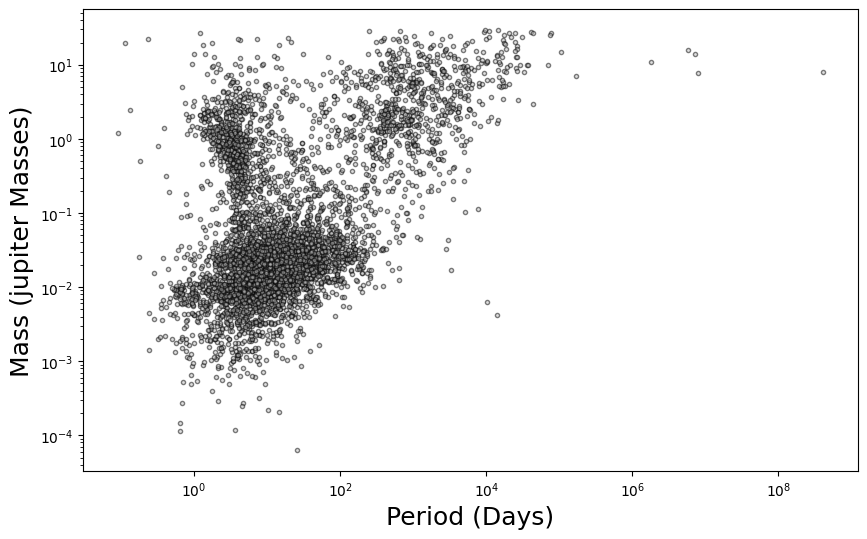

In [6]:
# create a scatter plot of Period (Days) vs Mass (Jupiter Masses) 

# create a figure object and set its size
plt.figure(figsize=(10, 6))

# plot the relevant columns from the DataFrame. 
# You can adjust different parameters like alpha (transparency), color, edgecolor, marker, etc.
plt.scatter(df['pl_orbper'], df['pl_bmassj'], alpha=0.5, color='silver', edgecolor='k', marker='.')

# set the x and y scales to logarithmic so that we can see the data better
plt.xscale('log')
plt.yscale('log')

# label your axes
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (jupiter Masses)', fontsize=18)


The above plot shows us the distribution of planet masses and periods like the one on Exoplanet Archive. However, we can take it a step further and distinguish the points according to their discovery method, like the plot online.

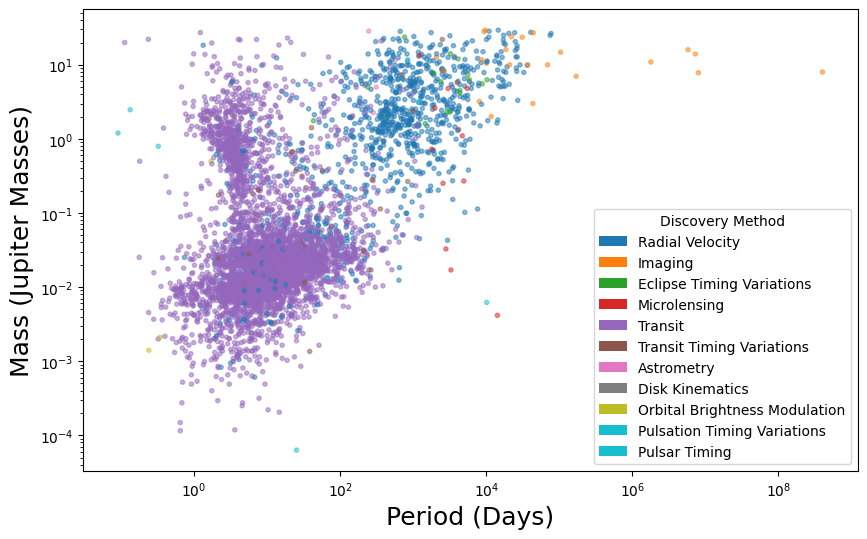

In [7]:
# Taking the same setup as above, but now we will color the points by discovery method
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Period (Days)', fontsize=18)
plt.ylabel('Mass (Jupiter Masses)', fontsize=18)

# convert discovery methods to numeric codes for coloring, and hold labels
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# use the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10# choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_bmassj'], c=colors, alpha=0.5, marker='.') #plot data

# add a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')
plt.savefig('Mass to period plot')

Now that you've seen an example, recreate another plot that was already generated on the NASA Exoplanet archive.

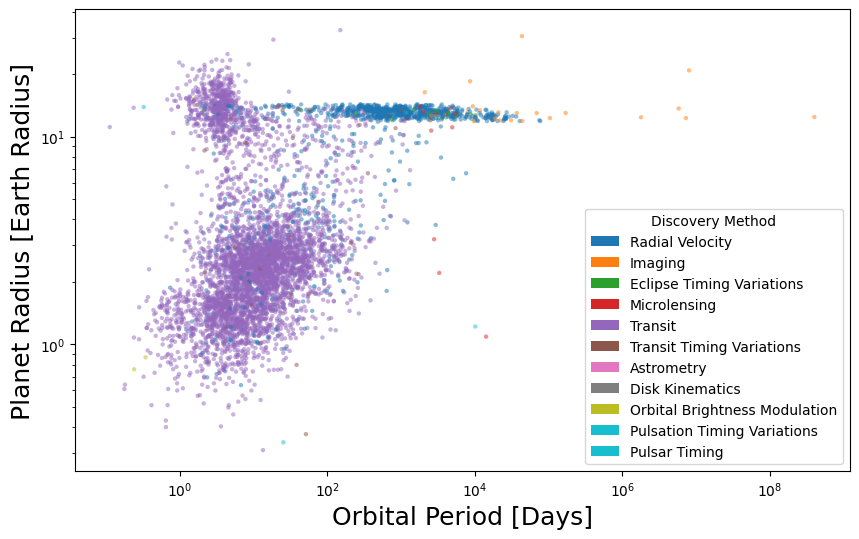

In [8]:
# Plotting planets by earth radius and orbital period
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period [Days]', fontsize=18)
plt.ylabel('Planet Radius [Earth Radius]', fontsize=18)

# convert discovery methods to numeric codes for coloring, and hold labels
discmethods = df['discoverymethod']
dm_num = pd.factorize(discmethods)[0]

# using the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10# choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping
plt.scatter(df['pl_orbper'], df['pl_rade'], c=colors, alpha=0.5, marker='.', linewidths= 0.1) #plot data

# adding a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Method', loc='lower right')
plt.savefig('radius to period plot')

### Part 3: Filtering your data

We saw during the live session that we can filter the data table to include only a subset of planets that we're particularly interested in. Since we downloaded all systems already, we can also filter them here. Let's explore the different kinds of planets that have been discovered by TESS and Kepler, the two main transiting planet missions.

In [9]:
# create Boolean masks to filter the DataFrame for planets discovered by TESS and by Kepler
tess_mask = df['disc_facility'].str.contains('TESS', case=False, na=False)
kepler_mask = df['disc_facility'].str.contains('Kepler', case=False, na=False)

# filter the DataFrame using the masks
tess_planets = df[tess_mask]
kepler_planets = df[kepler_mask]

# How many planets were discovered by TESS and Kepler?
print(len(tess_planets))
print(len(kepler_planets))

643
2784


Let's compare the different planet populations discovered by Kepler and by TESS. 

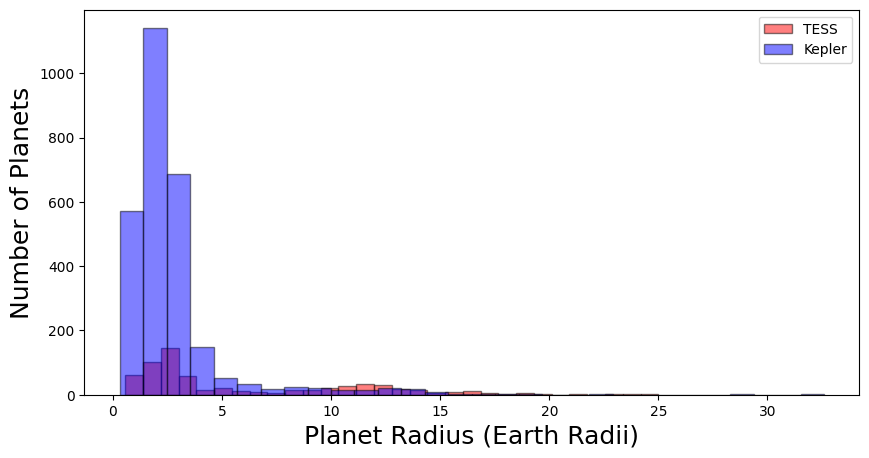

In [10]:
# create a histogram of planet radii for TESS and Kepler planets in Earth radii
plt.figure(figsize=(10, 5))

# plot the data
plt.hist(tess_planets['pl_rade'], bins=30, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=30, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()

Let's improve this histogram to create a more informative visual comparison of the two distributions. We can assign common bins and set the axes to logarithmic scales, for example.

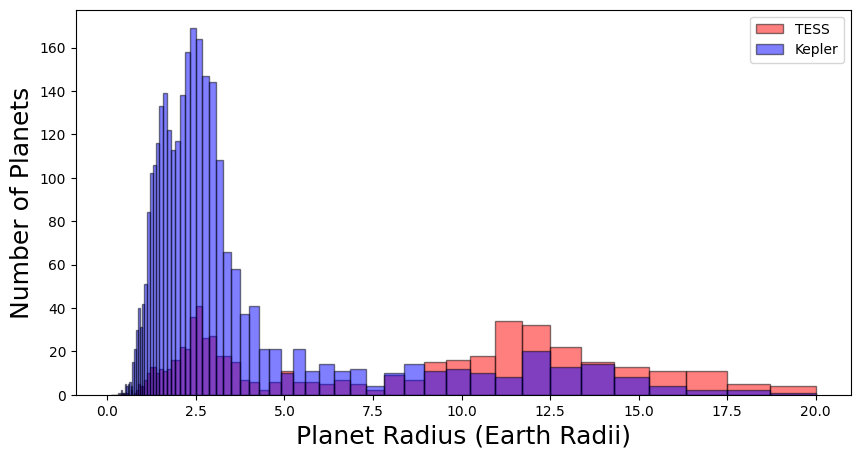

In [11]:
plt.figure(figsize=(10, 5))

# define informative bins for the histogram
bins = np.logspace(np.log10(0.1), np.log10(20), 80) 

# finish on your own
# plot the data
plt.hist(tess_planets['pl_rade'], bins=bins, alpha=0.5, label='TESS', color='red', edgecolor='black')
plt.hist(kepler_planets['pl_rade'], bins=bins, alpha=0.5, label='Kepler', color='blue', edgecolor='black')

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()
plt.savefig('radius number for tess and kepler')

What are the most notable differences between the two distributions? What are the similarities? Try re-plotting a 'zoomed-in' section of the above histogram to better view the 'radius valley'.

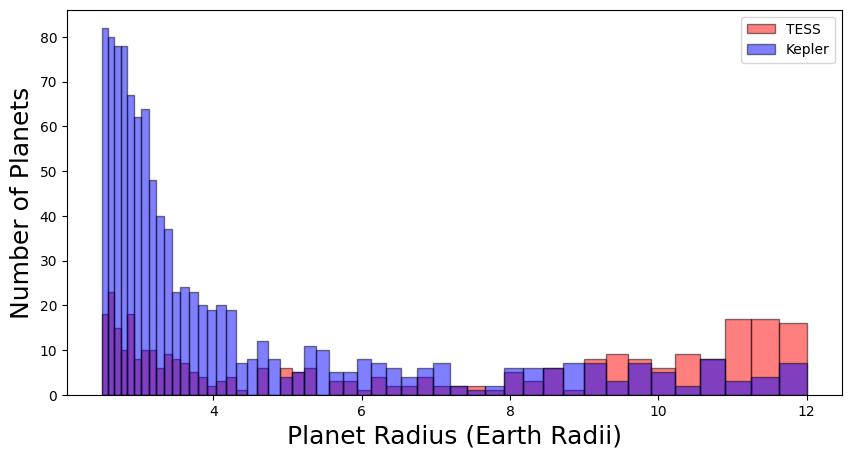

In [12]:
plt.figure(figsize=(10, 5))

# define informative bins for the histogram
bins = np.logspace(np.log10(2.5), np.log10(12), 50)

# plot the data
plt.hist(tess_planets['pl_rade'], bins=bins, alpha=0.5, label='TESS', color='red', edgecolor='black',)
plt.hist(kepler_planets['pl_rade'], bins=bins, alpha=0.5, label='Kepler', color='blue', edgecolor='black',)

plt.xlabel('Planet Radius (Earth Radii)',fontsize=18)
plt.ylabel('Number of Planets',fontsize=18)

plt.legend()

Use different filters and functions on the data table to answer the following questions:
- How many planets were discovered using the Radial Velocity method?
- How far away is the furthest confirmed exoplanet? What is its name?
- How many planets are smaller than the Earth?

In [13]:
# create a mask for planets discovered by the Radial Velocity method
rv_mask = df['discoverymethod'].str.contains('radial', case=False, na=False)

rv_planets = df[rv_mask]

print(len(rv_planets))

# find the furthest confirmed exoplanet

planet_distances = df['sy_dist']
max_dist_planet = planet_distances.max()
print(max_dist_planet)

# count the number of planets smaller than Earth
earth_radius_mask = df['pl_rade'].values <= 1
earth_radius_planets = df[earth_radius_mask]
print(len(earth_radius_planets))


1128
8500.0
231


Now that we've had some practice, try out the following exercise. Select only planets that have mass measurements using the same Boolean mask method we did earlier. Then, select a subset of the planets with mass mesurements that also have planet radius measurements (i.e., planet radius and mass columns are not empty/NaN). 

In [14]:
# create a mask for planets with mass measurements
mass_mask = df['pl_bmasse'].notna()


# create a mask for planets that also have planet radius measurements (i.e., planet radius column is not empty/NaN!)
radius_mask = df['pl_rade'].notna()

# how many planets were discovered by the Radial Velocity method?
rv_mask = df['discoverymethod'].str.contains('radial', case=False, na=False)

selected_planets = df[rv_mask]
print(len(selected_planets))
# how many of those have planet radius measurements?
selected_planets2 = df.loc[rv_mask].loc[radius_mask]
print(len(selected_planets2))

1128
1118


Now that we have our filtered data, let's make a plot that informs us about this subset of planets. Make a Planet Density (g/cm^3) vs. Planet Radius (Earth Radius) plot. The unit conversions have been coded for you using the astropy package.

In [15]:
import astropy.units as u

# convert planet radius from Earth radii to centimeters
rad_cm = selected_planets2['pl_rade'] * u.R_earth.to(u.cm)

# convert planet mass from Earth masses to g
mass_g = selected_planets2['pl_bmasse'] * u.M_earth.to(u.g)

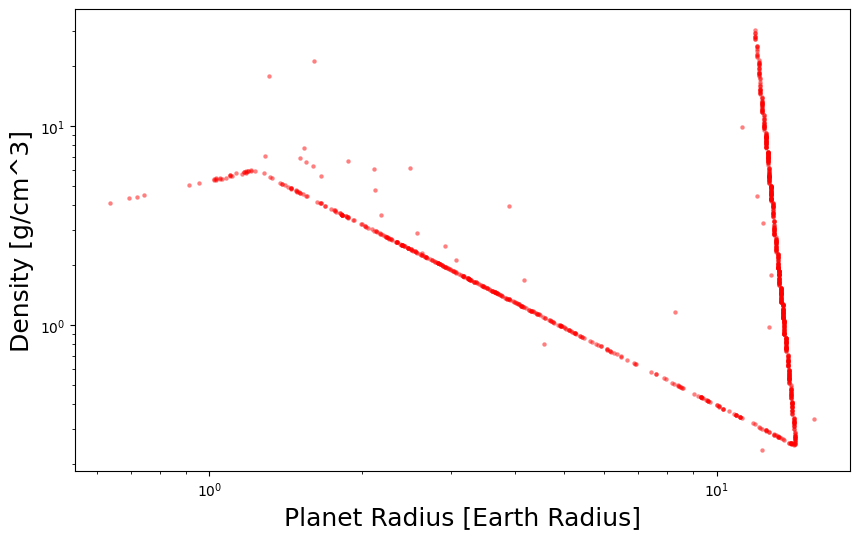

In [21]:
# calculate density in g/cm^3
density = mass_g / ((4/3)*np.pi*(rad_cm**3))

# create a scatter plot of Density (g/cm^3) vs Planet Radius (Earth Radii)
plt.figure(figsize=(10, 6))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Planet Radius [Earth Radius]', fontsize=18)
plt.ylabel('Density [g/cm^3]', fontsize=18)

plt.scatter(selected_planets2['pl_rade'], density, c='red', alpha=0.5, marker='.', linewidths= 0.1) #plot data


### Part 4: Choose your own adventure

Using the various things you've learned throughout this tutorial and assignment, create a plot to visualize the correlation between any parameters of your choosing. Choose a specific and interesting subset of planets (e.g., planets discovered via the radial velocity method, nearby planets, etc.). Write down some interesting things you learned from your plot. 

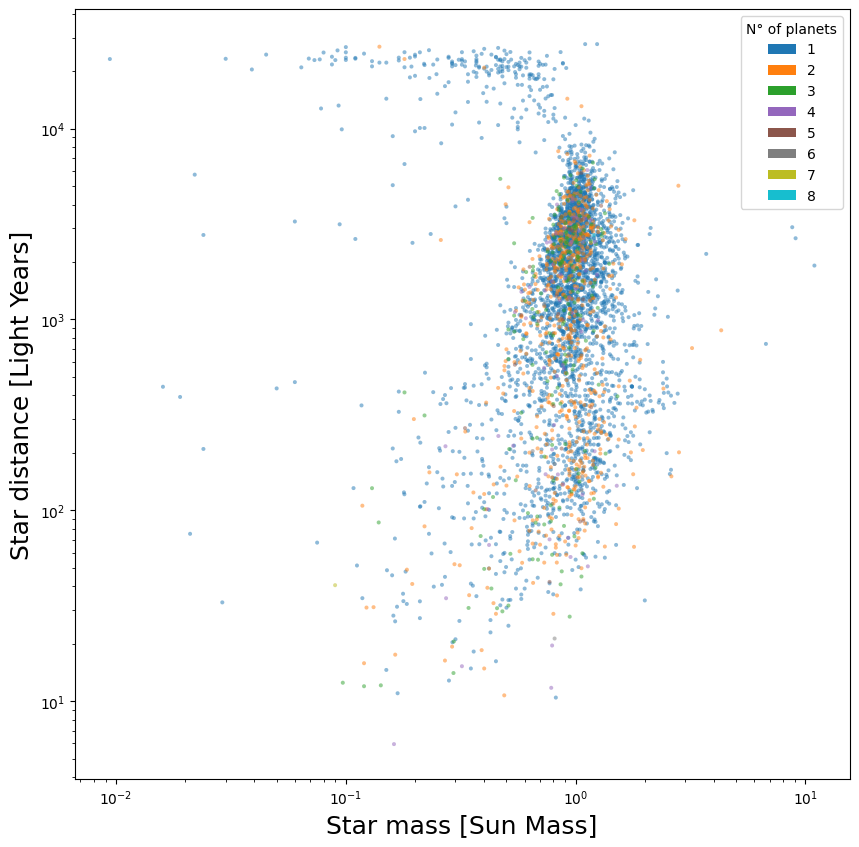

In [17]:
# code here
# creating a figure for the plot
plt.figure(figsize=(10, 10))
plt.xscale('log') # setting x scale to log
plt.yscale('log') # setting y scale to log
plt.xlabel('Star mass [Sun Mass]', fontsize=18) # setting x label
plt.ylabel('Star distance [Light Years]', fontsize=18) # setting y label

#making masks for star systems with only 1 star and removing systems without a star mass listed
single_star_mask = df['sy_snum'].values == 1
star_mass_bolean_mask = df['st_mass'].notna()
star_dist_bolean_mask = df['sy_dist'].notna()

#applying the masks on the data frame
selected_planets = df.loc[single_star_mask].loc[star_mass_bolean_mask].loc[star_dist_bolean_mask]
#sorting the data frame by hostname
sorted_planets = selected_planets.sort_values(['hostname'], ascending = [True])
#selecting only the first of each hostname in order to create a selection of only 1 entry per star system
unique_systems = sorted_planets.groupby('hostname').first().reset_index()
#sorting the df by stellar mass
unique_systems_sorted = unique_systems.sort_values(['sy_pnum'], ascending=[True])

# convert discovery methods to numeric codes for coloring, and hold labels
planet_number = unique_systems_sorted['sy_pnum']
pn_num = pd.factorize(planet_number)[0]
planet_number_sorted = planet_number.sort_values(ascending=[True])

# using the 'c' parameter to color the points by planet numbers
cmap = plt.cm.tab10# choose a colormap
colors = cmap(pn_num / pn_num.max())  # normalize the numeric codes for color mapping

plt.scatter(unique_systems_sorted['st_mass'], unique_systems_sorted['sy_dist']*3.26, c=colors, alpha=0.5, marker='.', linewidths=0.1, s=30)
# adding a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/pn_num.max()), label=label) for i, label in enumerate(planet_number_sorted.unique())]
plt.legend(handles=legend_elements, title='N° of planets', loc='upper right')
plt.savefig('star mass to radius with number of planets as labels')


I made a plot that compares star masses and distance for every system with a single star inside. Then I labeled every system with it's corresponding planet number. From this chart we can clearly tell that the vast majority of systems has only 1 planet discovered as of today and as we go up in number of discovered planet we see that less and less star system appear. I calculated that 95.75% of the selected star systems have a maximum of 4 planets discovered.

0       12.2
1       12.3
2       13.1
3       12.6
4       13.5
        ... 
5928    14.0
5929    12.3
5930    12.5
5931    14.2
5932    13.4
Name: pl_rade, Length: 5887, dtype: float64


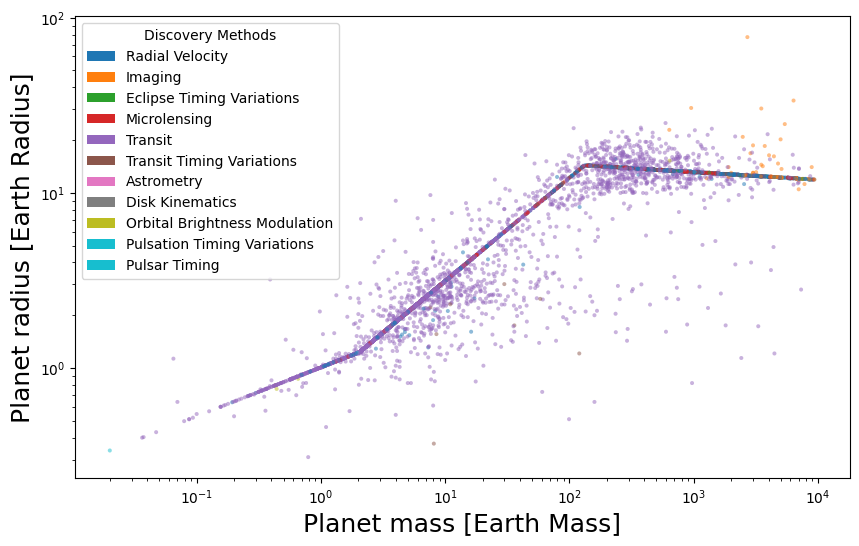

In [56]:
# code here
# creating a figure for the plot
plt.figure(figsize=(10, 6))
plt.xscale('log') # setting x scale to log
plt.yscale('log') # setting y scale to log
plt.xlabel('Planet mass [Earth Mass]', fontsize=18) # setting x label
plt.ylabel('Planet radius [Earth Radius]', fontsize=18) # setting y label

# making masks for planets that don't have mass or radius measurements
planet_mass_mask = df['pl_bmasse'].notna()
planet_radius_mask = df['pl_rade'].notna()

# applying the masks on the data frame
selected_planets = df.loc[planet_mass_mask].loc[planet_radius_mask]
print(selected_planets['pl_rade'])
# convert discovery methods to numeric codes for coloring, and hold labels
discovery_methods = selected_planets['discoverymethod']
dm_num = pd.factorize(discovery_methods)[0]

# using the 'c' parameter to color the points by discovery method
cmap = plt.cm.tab10# choose a colormap
colors = cmap(dm_num / dm_num.max())  # normalize the numeric codes for color mapping

plt.scatter(selected_planets['pl_bmasse'], selected_planets['pl_rade'], c=colors, alpha=0.5, marker='.', linewidths=0.1, s=30)
# adding a legend to indicate which color corresponds to which discovery method
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cmap(i/dm_num.max()), label=label) for i, label in enumerate(discmethods.unique())]
plt.legend(handles=legend_elements, title='Discovery Methods', loc='upper left')
plt.savefig('Planet mass to radius with number of discovery methods as labels')


I also created this plot where you can see the different planets in relation to their mass and radius. we can clearly see 3 different lines indicating different densities of the planets probably the transitions from rocky to super-earth or similar and finally to gas giants.